In [33]:
import numpy as np
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno


**IMPORTACION DEL DATA SET**

In [2]:
archivo= ('csv/diabetes_dataset.csv')

In [4]:
data = pd.read_csv(archivo)

In [5]:
data['Outcome'] = ((data['Fasting_Blood_Glucose'] >= 126) | (data['HbA1c'] > 6.5)).astype('int64')

In [6]:
data.drop(columns=['Unnamed: 0'], inplace=True)

**Lectura del DATASET**

In [7]:
data.head()

,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,...,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes,Outcome
0,58,Female,White,35.8,83.4,123.9,10.9,152,114,197.8,...,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1,1
1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,261.6,...,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1,1
2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,261.0,...,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0,1
3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,183.4,...,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0,1
4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,203.2,...,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0,1


In [8]:
data.shape

(10000, 21)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            10000 non-null  int64  
 1   Sex                            10000 non-null  object 
 2   Ethnicity                      10000 non-null  object 
 3   BMI                            10000 non-null  float64
 4   Waist_Circumference            10000 non-null  float64
 5   Fasting_Blood_Glucose          10000 non-null  float64
 6   HbA1c                          10000 non-null  float64
 7   Blood_Pressure_Systolic        10000 non-null  int64  
 8   Blood_Pressure_Diastolic       10000 non-null  int64  
 9   Cholesterol_Total              10000 non-null  float64
 10  Cholesterol_HDL                10000 non-null  float64
 11  Cholesterol_LDL                10000 non-null  float64
 12  GGT                            10000 non-null  

In [10]:
data.dtypes

Age                                int64
Sex                               object
Ethnicity                         object
BMI                              float64
Waist_Circumference              float64
Fasting_Blood_Glucose            float64
HbA1c                            float64
Blood_Pressure_Systolic            int64
Blood_Pressure_Diastolic           int64
Cholesterol_Total                float64
Cholesterol_HDL                  float64
Cholesterol_LDL                  float64
GGT                              float64
Serum_Urate                      float64
Physical_Activity_Level           object
Dietary_Intake_Calories            int64
Alcohol_Consumption               object
Smoking_Status                    object
Family_History_of_Diabetes         int64
Previous_Gestational_Diabetes      int64
Outcome                            int64
dtype: object

In [11]:
data.describe()

,Age,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Dietary_Intake_Calories,Family_History_of_Diabetes,Previous_Gestational_Diabetes,Outcome
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000
mean,44.620400,29.418150,94.79707,134.776210,9.507510,134.163700,89.558700,225.165540,55.019340,134.35377,55.16822,5.503430,2742.481900,0.507000,0.516500,0.9018
std,14.343489,6.170866,14.38329,37.633544,3.176421,26.110317,17.237792,42.963744,14.537371,37.50238,25.88180,1.455091,716.643803,0.499976,0.499753,0.2976
min,20.000000,18.500000,70.00000,70.000000,4.000000,90.000000,60.000000,150.000000,30.000000,70.00000,10.00000,3.000000,1500.000000,0.000000,0.000000,0.0000
25%,32.000000,24.100000,82.20000,102.175000,6.800000,112.000000,75.000000,187.875000,42.300000,101.67500,32.60000,4.200000,2129.000000,0.000000,0.000000,1.0000
50%,45.000000,29.500000,94.90000,134.500000,9.500000,134.000000,89.000000,225.500000,55.200000,134.40000,55.45000,5.500000,2727.000000,1.000000,1.000000,1.0000
75%,57.000000,34.700000,107.00000,167.800000,12.300000,157.000000,105.000000,262.400000,67.900000,166.40000,77.50000,6.800000,3368.000000,1.000000,1.000000,1.0000
max,69.000000,40.000000,120.00000,200.000000,15.000000,179.000000,119.000000,300.000000,80.000000,200.00000,100.00000,8.000000,3999.000000,1.000000,1.000000,1.0000


**Estado de la data**

In [ ]:
# numero de valores faltantes por columna
data.isnull().sum()

Age                                 0
Sex                                 0
Ethnicity                           0
BMI                                 0
Waist_Circumference                 0
Fasting_Blood_Glucose               0
HbA1c                               0
Blood_Pressure_Systolic             0
Blood_Pressure_Diastolic            0
Cholesterol_Total                   0
Cholesterol_HDL                     0
Cholesterol_LDL                     0
GGT                                 0
Serum_Urate                         0
Physical_Activity_Level             0
Dietary_Intake_Calories             0
Alcohol_Consumption              3320
Smoking_Status                      0
Family_History_of_Diabetes          0
Previous_Gestational_Diabetes       0
Outcome                             0
dtype: int64

In [ ]:
## porcentaje de valores nulos
data.isna().sum()/len(data)*100

Age                               0.0
Sex                               0.0
Ethnicity                         0.0
BMI                               0.0
Waist_Circumference               0.0
Fasting_Blood_Glucose             0.0
HbA1c                             0.0
Blood_Pressure_Systolic           0.0
Blood_Pressure_Diastolic          0.0
Cholesterol_Total                 0.0
Cholesterol_HDL                   0.0
Cholesterol_LDL                   0.0
GGT                               0.0
Serum_Urate                       0.0
Physical_Activity_Level           0.0
Dietary_Intake_Calories           0.0
Alcohol_Consumption              33.2
Smoking_Status                    0.0
Family_History_of_Diabetes        0.0
Previous_Gestational_Diabetes     0.0
Outcome                           0.0
dtype: float64

In [14]:
## datos duplicados
data.duplicated().sum()

0

In [15]:
## valores imcompletos
data.isnull().any()

Age                              False
Sex                              False
Ethnicity                        False
BMI                              False
Waist_Circumference              False
Fasting_Blood_Glucose            False
HbA1c                            False
Blood_Pressure_Systolic          False
Blood_Pressure_Diastolic         False
Cholesterol_Total                False
Cholesterol_HDL                  False
Cholesterol_LDL                  False
GGT                              False
Serum_Urate                      False
Physical_Activity_Level          False
Dietary_Intake_Calories          False
Alcohol_Consumption               True
Smoking_Status                   False
Family_History_of_Diabetes       False
Previous_Gestational_Diabetes    False
Outcome                          False
dtype: bool

In [16]:
## valores unicos
data.nunique()

Age                                50
Sex                                 2
Ethnicity                           4
BMI                               216
Waist_Circumference               501
Fasting_Blood_Glucose            1301
HbA1c                             111
Blood_Pressure_Systolic            90
Blood_Pressure_Diastolic           60
Cholesterol_Total                1499
Cholesterol_HDL                   501
Cholesterol_LDL                  1301
GGT                               901
Serum_Urate                        51
Physical_Activity_Level             3
Dietary_Intake_Calories          2451
Alcohol_Consumption                 2
Smoking_Status                      3
Family_History_of_Diabetes          2
Previous_Gestational_Diabetes       2
Outcome                             2
dtype: int64

**Prepocesamiento**

In [19]:
# remplazo por la moda en la columna 'Alcohol_Consumption'
most_common = data['Alcohol_Consumption'].mode()[0]
data['Alcohol_Consumption'].fillna(most_common, inplace=True)

In [20]:
# visualizacion de los datos cambiados
data['Alcohol_Consumption'].head()

0    Moderate
1    Moderate
2       Heavy
3    Moderate
4       Heavy
Name: Alcohol_Consumption, dtype: object

In [21]:
# agrupamiento por rango de edad
bins = [0, 19, 29, 39, 49, 59, 69, 79, float('inf')]
labels = ['-20', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=True)

In [23]:
# visualizacion de la distribucion de edad
data['Age Group'].head()

0    50-59
1    40-49
2    30-39
3    60-69
4    20-29
Name: Age Group, dtype: category
Categories (8, object): ['-20' < '20-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70-79' < '80+']

In [24]:
## datos completa
data.head()

,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,...,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes,Outcome,Age Group
0,58,Female,White,35.8,83.4,123.9,10.9,152,114,197.8,...,37.5,7.2,Moderate,1538,Moderate,Never,0,1,1,50-59
1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,261.6,...,88.5,6.1,Moderate,2653,Moderate,Current,0,1,1,40-49
2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,261.0,...,56.2,6.9,Low,1684,Heavy,Former,1,0,1,30-39
3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,183.4,...,34.4,5.4,Low,3796,Moderate,Never,1,0,1,60-69
4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,203.2,...,81.9,7.4,Moderate,3161,Heavy,Current,0,0,1,20-29


<Figure size 1000x600 with 0 Axes>

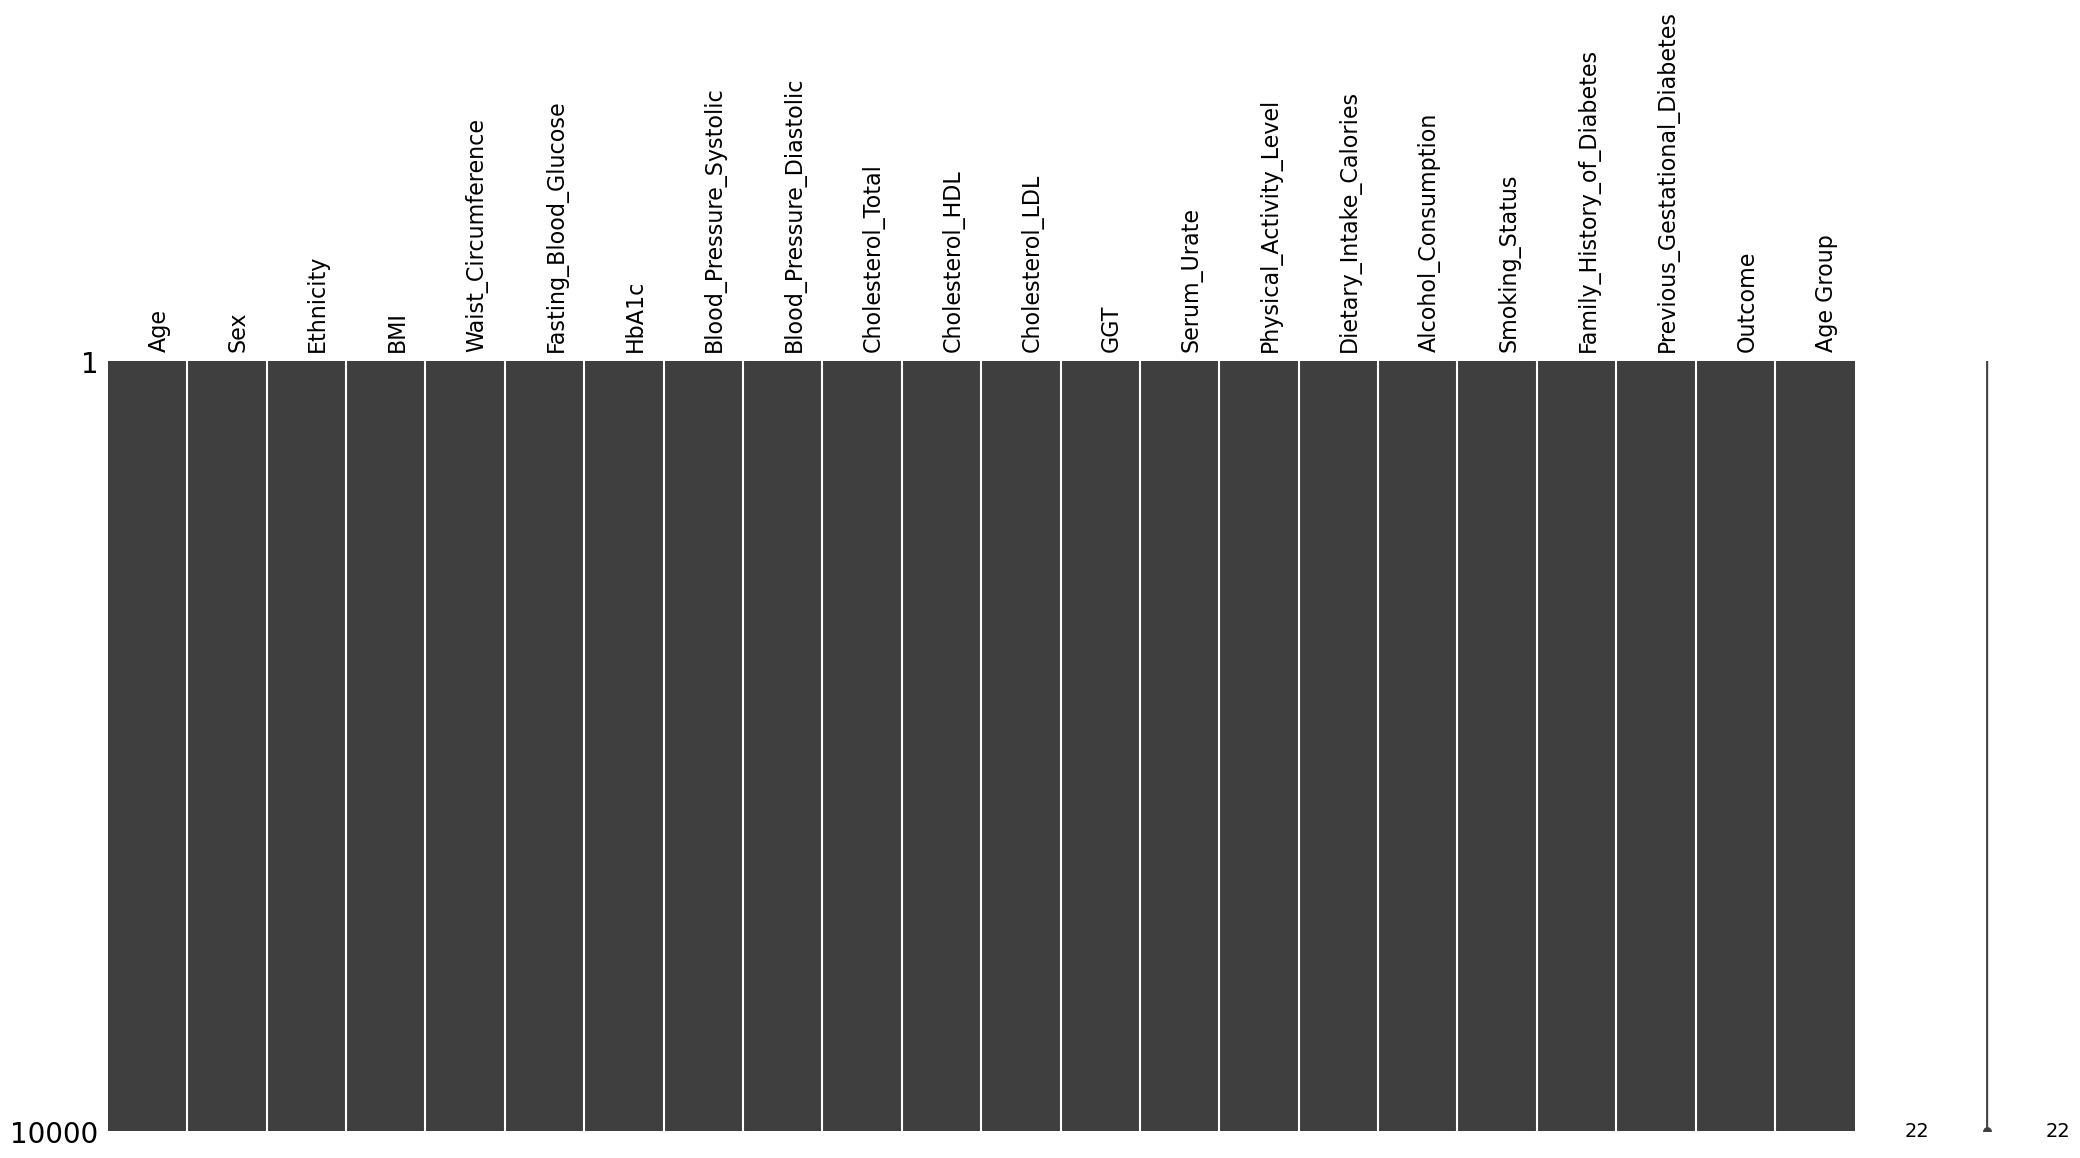

In [34]:
plt.figure(figsize=(10, 6))
msno.matrix(data)
plt.xticks(rotation=90)
plt.show()

**VISUALIZACION DE LA DATA**

In [36]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

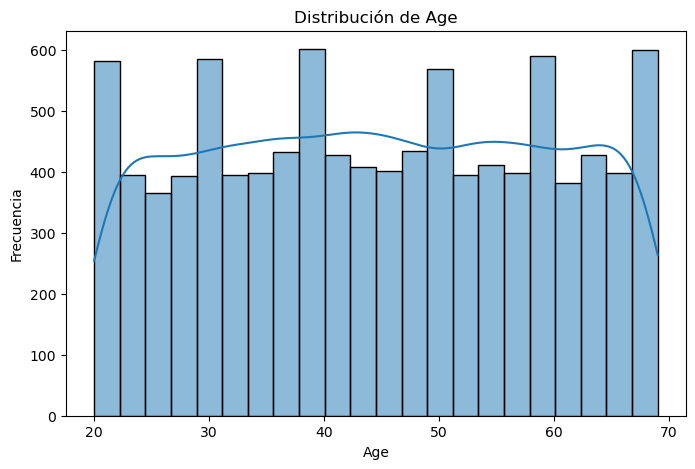

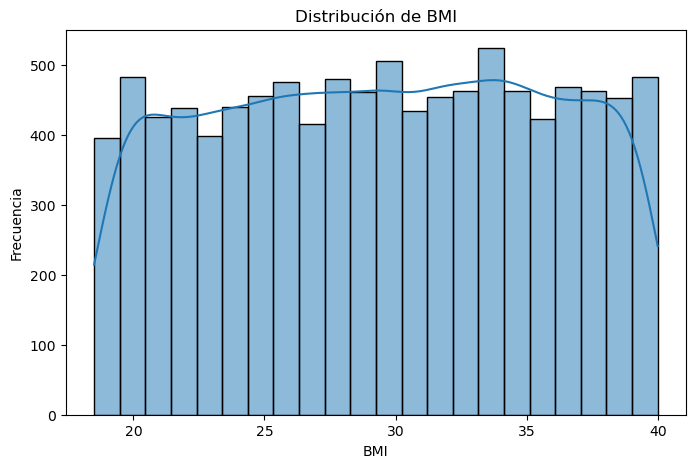

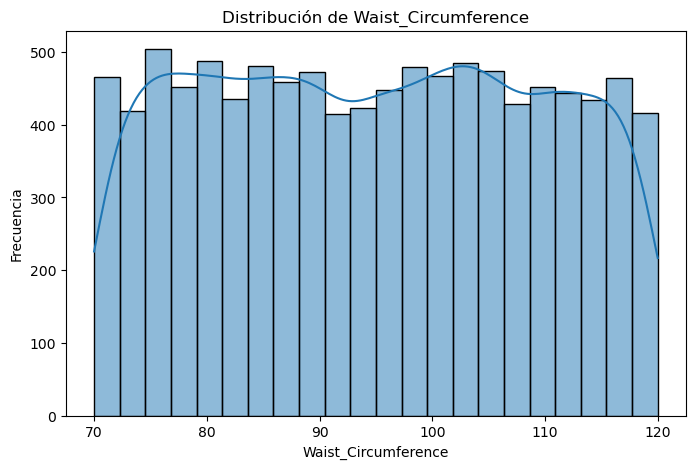

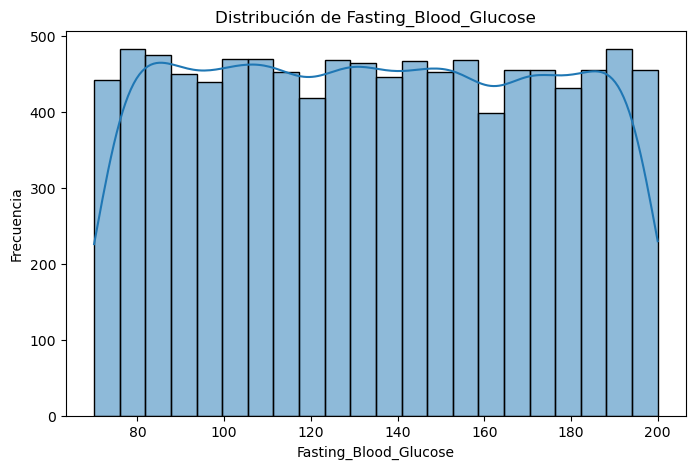

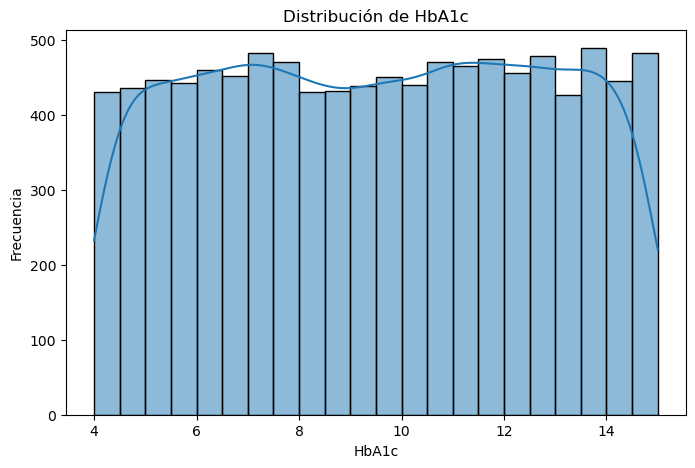

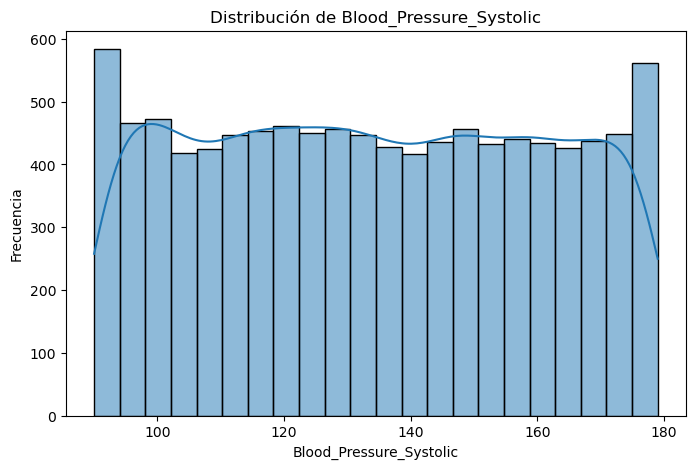

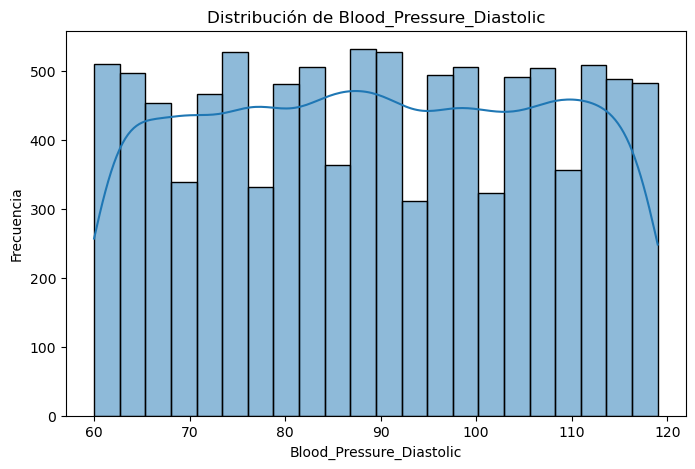

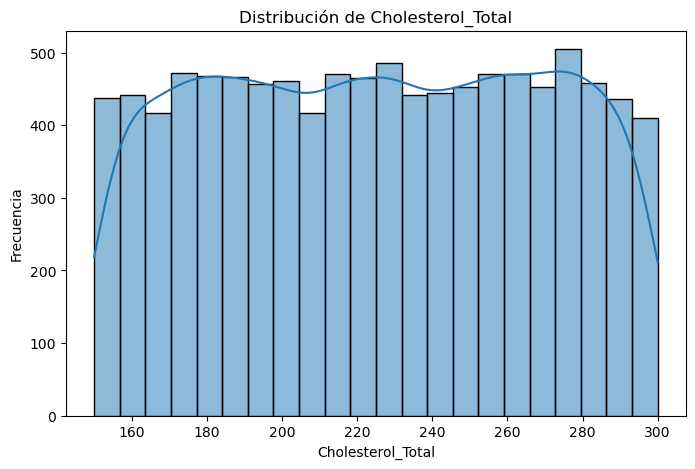

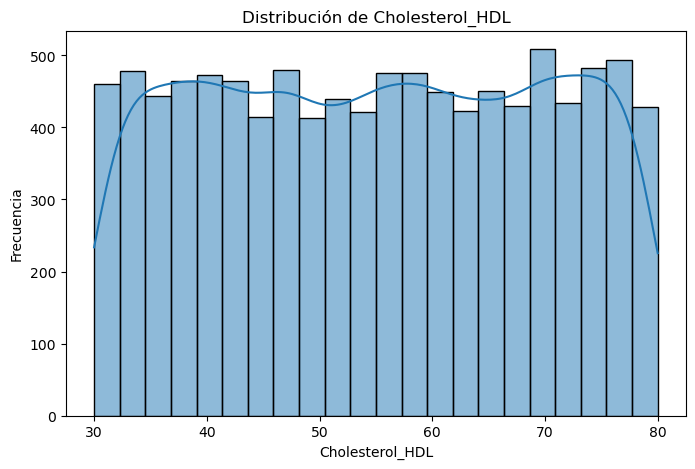

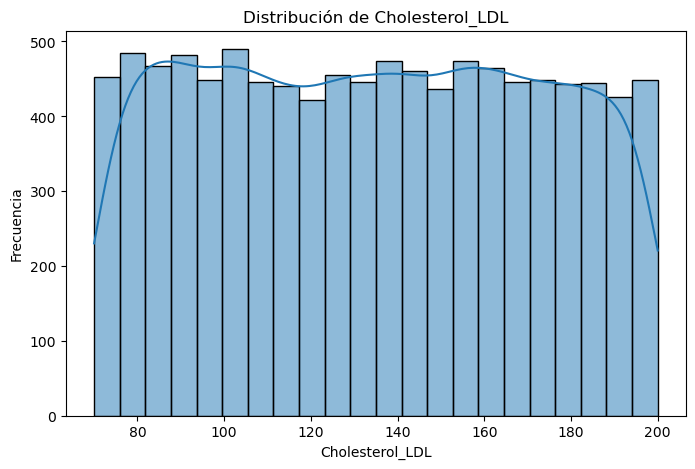

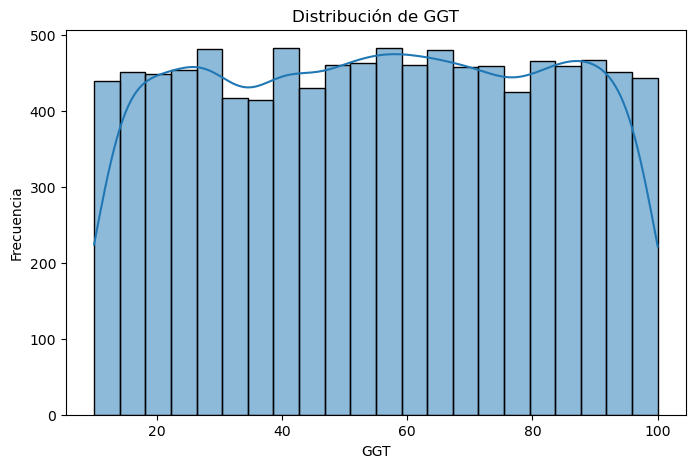

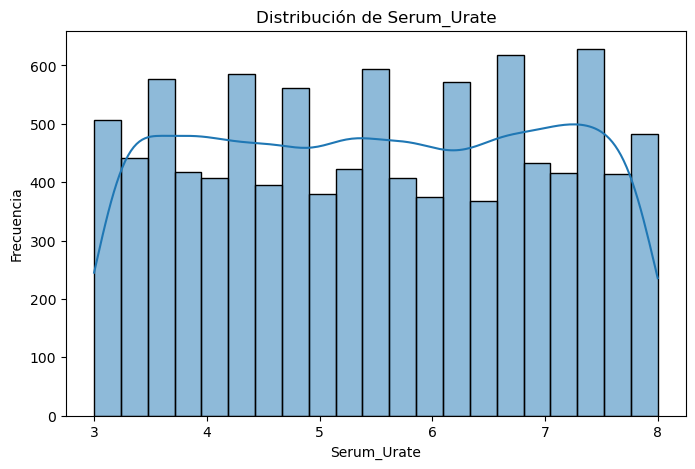

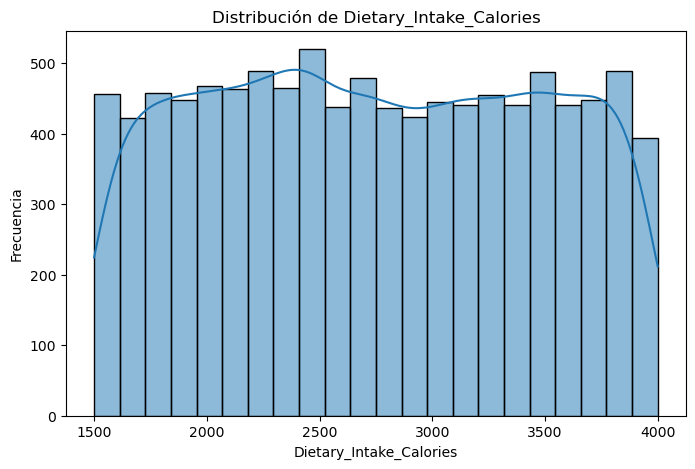

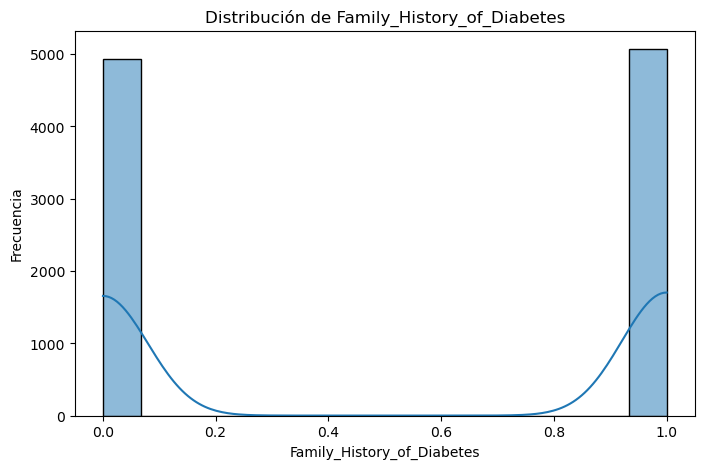

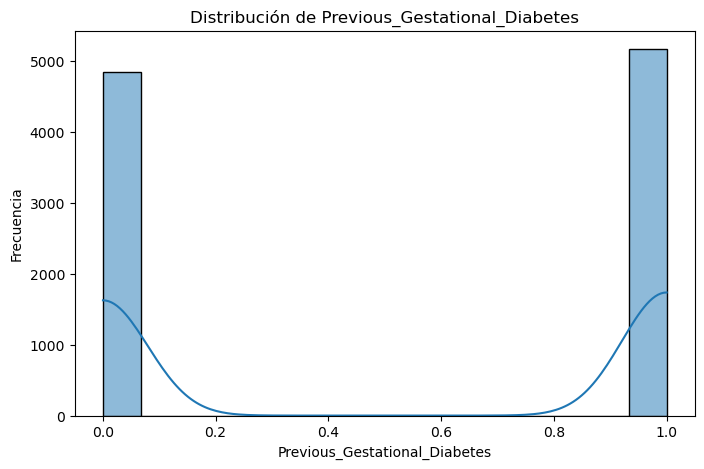

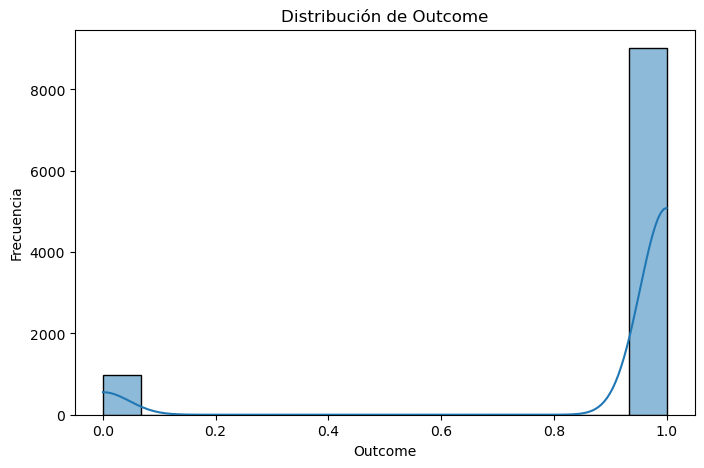

In [37]:
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

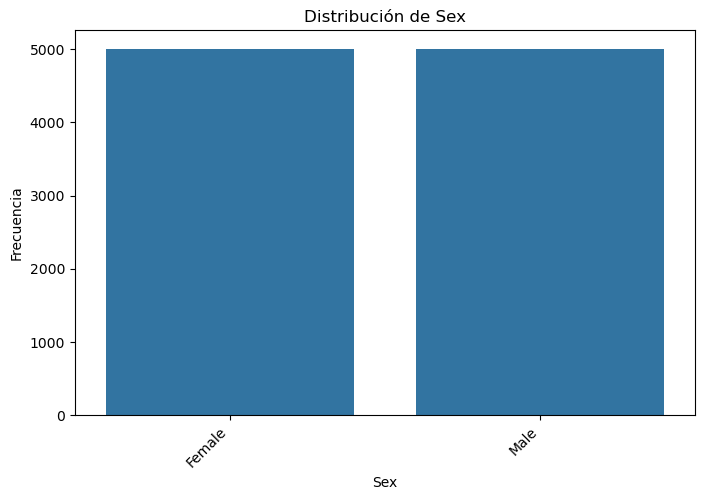

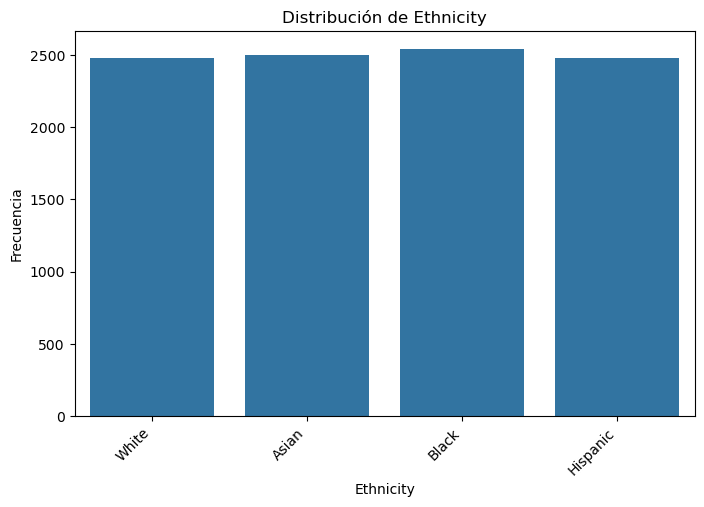

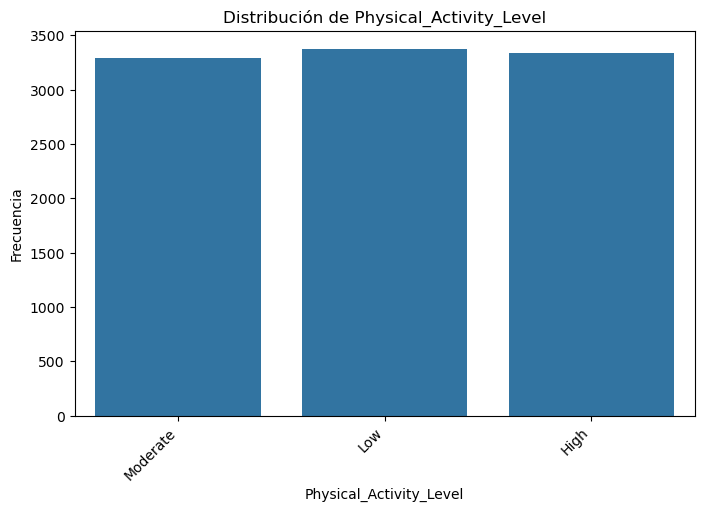

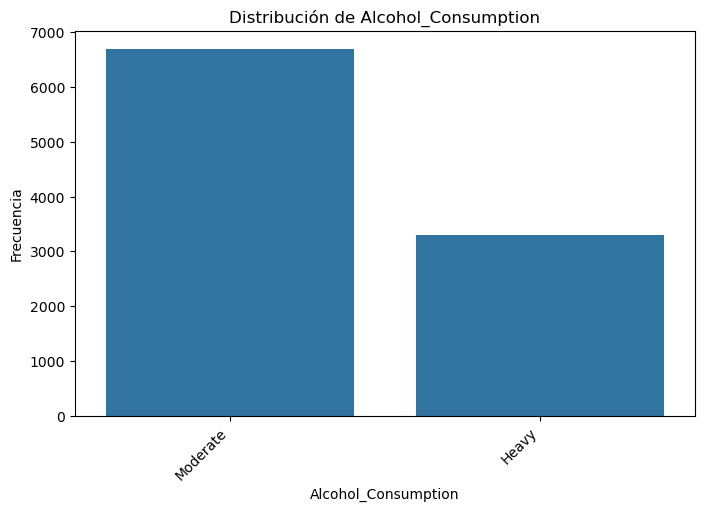

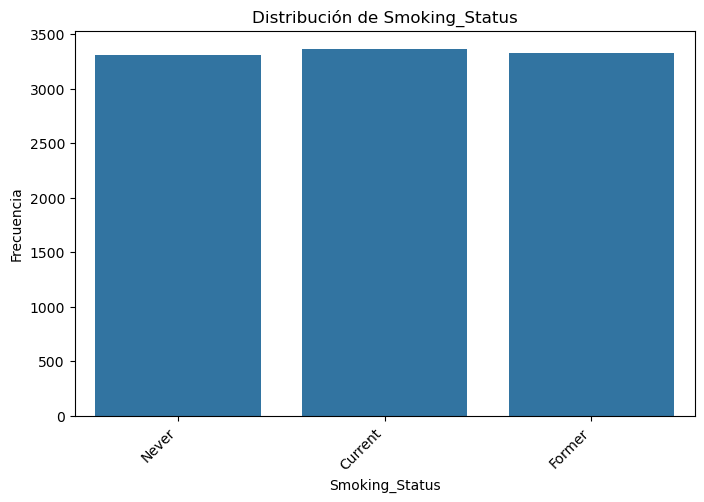

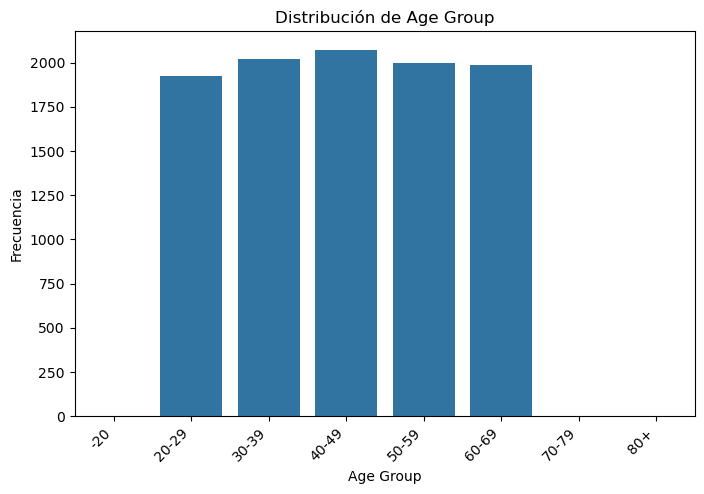

In [38]:
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=data)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45, ha='right')
    plt.show()

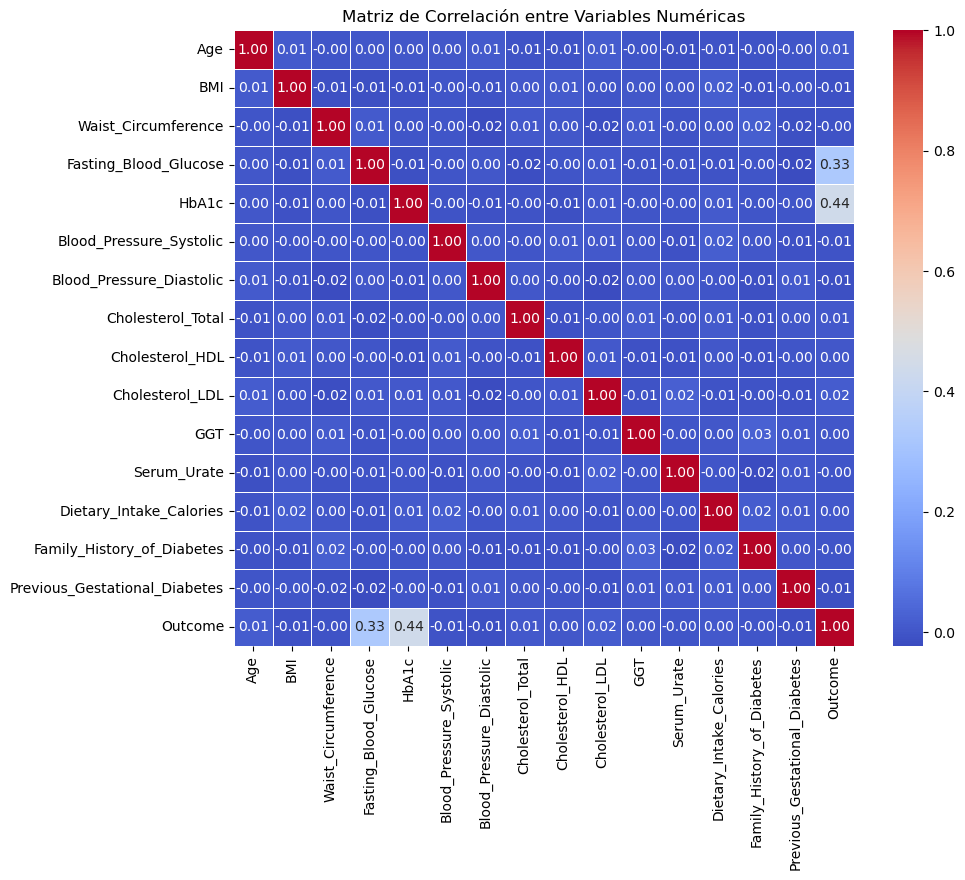

In [39]:
# Calcular la matriz de correlación
corr_matrix = data[numeric_cols].corr()
# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=ax)
ax.set_title("Matriz de Correlación entre Variables Numéricas")
plt.show()

C:\Users\Jonna\AppData\Local\Temp\ipykernel_15232\2327214971.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


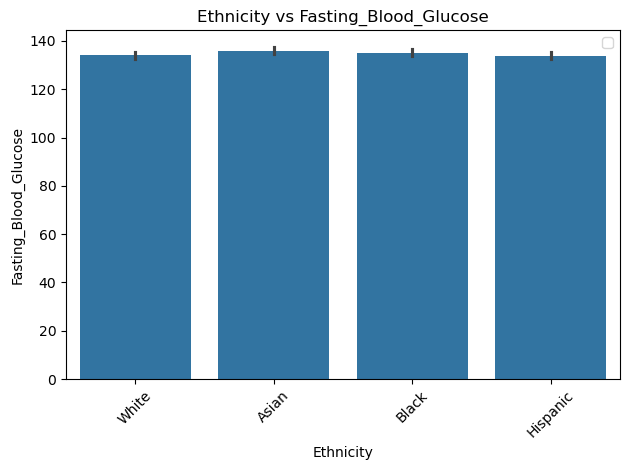

In [40]:
sns.barplot(x=data['Ethnicity'], y= data['Fasting_Blood_Glucose'], data=data)
plt.title('Ethnicity vs Fasting_Blood_Glucose') 
plt.xticks(rotation=45)  
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\Jonna\AppData\Local\Temp\ipykernel_15232\707497576.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


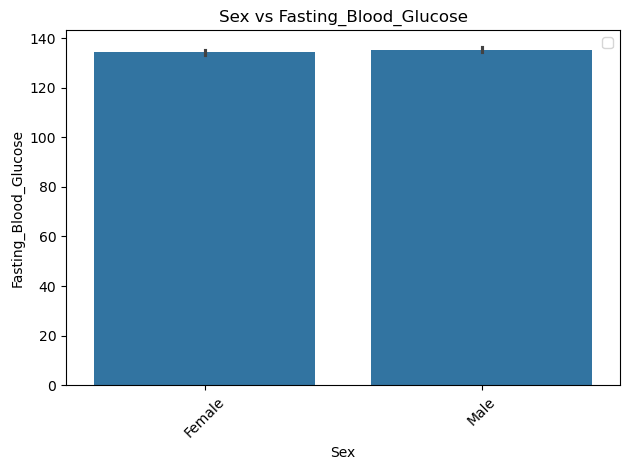

In [41]:
sns.barplot(x=data['Sex'], y= data['Fasting_Blood_Glucose'], data=data)
plt.title('Sex vs Fasting_Blood_Glucose') 
plt.xticks(rotation=45)  
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\Jonna\AppData\Local\Temp\ipykernel_15232\3032523381.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = data.groupby('Age Group')['Fasting_Blood_Glucose'].mean().reset_index()


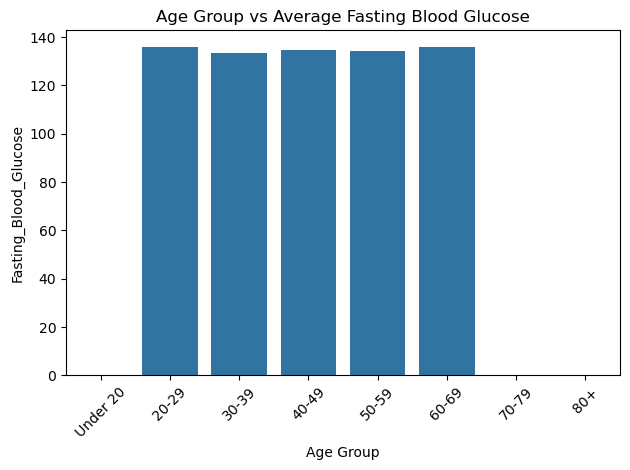

In [42]:
grouped_df = data.groupby('Age Group')['Fasting_Blood_Glucose'].mean().reset_index()

age_order = ['Under 20', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
grouped_df['Age Group'] = pd.Categorical(grouped_df['Age Group'], categories=age_order, ordered=True)
grouped_df = grouped_df.sort_values('Age Group')

sns.barplot(x='Age Group', y='Fasting_Blood_Glucose', data=grouped_df)
plt.title('Age Group vs Average Fasting Blood Glucose')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()